# 3. Visualizando Dados

### Matplotlib

* Existe uma grande variedade de ferramentas para visualizar dados.
* Matplotlib: uma das mais usadas.
  * Não serve para visualizações interativas.
  * Excelente para gráficos simples, como: gráficos de barras, de linhas e de dispersão,
* O módulo utilizado será o matplotlib.pyplot.
  * Mantém um estado interno da figura e ao final essa pode ser salva e/ou exibida.
  
Para fazer um gráfico simples é bem fácil:

In [2]:
%matplotlib inline

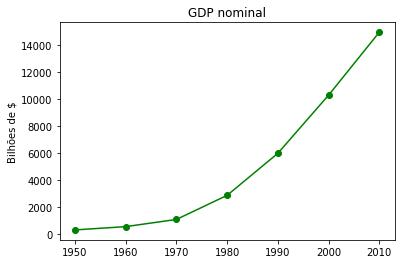

In [4]:
import matplotlib.pyplot as plt

# Dados para plotagem
years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

# Criação de um gráfico de linha onde os anos representam o eixo x e o gdp no eixo y
plt.plot(years, gdp, color='green', marker='o', linestyle='solid')

# Adiciona um título
plt.title("GDP nominal")

# Adiciona etiqueta ao eixo y
plt.ylabel("Bilhões de $")

# Exibe o gráfico
plt.show()

* Construir gráficos com boa qualidade de imagem é uma tarefa complicada. 
* Existem diversas formas de personalização de gráficos: rotulagem, estilo de linhas, marcadores, cores, etc.
* matplotlib é capaz de produzir gráficos complicados dentro de gráficos, formatação sofisticada e visualizações interativas. Verificar a documentação.

### Gráfico de Barra

* Ideal para mostrar a variação de quantidades entre um conjunto particular de itens.

Abaixo o gráfico mostra quantos oscars cada filme ganhou:

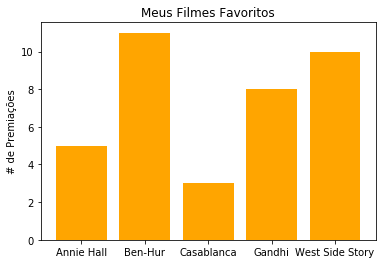

In [27]:
# Dados
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]

# A barras são centralizadas por padrão
xs = [i for i, _ in enumerate(movies)] 

# Plota as barras do gráfico com as coordenadas x [xs] e alturas [num_oscars]
plt.bar(xs, num_oscars, color='orange')

# Título e rotulagens
plt.ylabel("# de Premiações")
plt.title("Meus Filmes Favoritos")

# Nomeia o eixo x com os nomes dos filmes
plt.xticks([i for i, _ in enumerate(movies)], movies)

plt.show()

* Também pode ser utilizado para criar histogramas para a visualização da distribuição dos dados.

Como o gráfico criado abaixo:

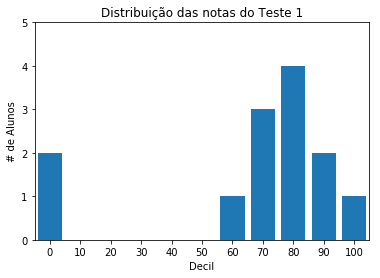

In [24]:
from collections import Counter
# Dados
grades = [83,95,91,87,70,0,85,82,100,67,73,77,0]
decile = lambda grade: grade//10*10
histogram = Counter(decile(grade) for grade in grades)

# Move cada barra em 4 pra esquerda, plota na altura correta com a largura de 8
plt.bar([x for x in histogram.keys()], histogram.values(), 8)

# Determina o eixo x de -5 a 105 e o eixo y de 0 a 5
plt.axis([-5, 105, 0, 5])

# Personalização
plt.xticks([10*i for i in range(11)])
plt.xlabel("Decil")
plt.ylabel("# de Alunos")
plt.title("Distribuição das notas do Teste 1")

plt.show()

* O terceiro argumento do plt.bar especifica a largura da barra.
* A chamada para plt.axis indica o intervalo de valores nos eixos e tem como parâmetro uma lista com os intervalos de x e y. Ex.: [-5, 105, 0, 5], x de -5 a 105 e y de 0 a 5.
* A chamada plt.xticks rotula o os valores eixo x.
* Deve-se ser cuidadoso ao usar plt.axis, pois, em um gráfico de barras, o eixo y deve sempre ser iniciado com 0. Caso o contrário, o gráfico perde a confiança.

Veja os exemplos abaixo:

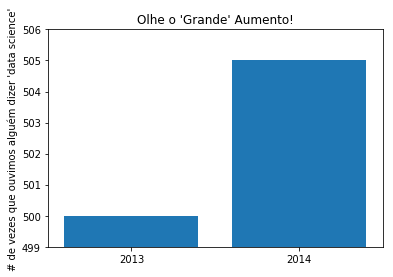

In [38]:
# Gráfico de barras com o eixo y iniciado em quase 500

mentions = [500, 505]
years = [2013,2014]

plt.bar(years, mentions)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")

# se você não fizer isso, matplotlib nomeará o eixo x de 0, 1
# e então adiciona a +2.013e3 para fora do canto (matplotlib feio!)
plt.ticklabel_format(useOffset=False)

# enganar o eixo y mostra apenas a parte acima de 500
plt.axis([2012.5,2014.5,499,506])
plt.title("Olhe o 'Grande' Aumento!")
plt.show()

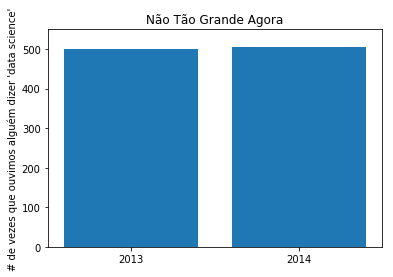

In [37]:
# O mesmo gráfico com o eixo y iniciado em 0

mentions = [500, 505]
years = [2013,2014]

plt.bar(years, mentions)
plt.xticks(years)
plt.ylabel("# de vezes que ouvimos alguém dizer 'data science'")

# se você não fizer isso, matplotlib nomeará o eixo x de 0, 1
# e então adiciona a +2.013e3 para fora do canto (matplotlib feio!)
plt.ticklabel_format(useOffset=False)

plt.axis([2012.5,2014.5,0,550])
plt.title("Não Tão Grande Agora")
plt.show()

### Gráficos de Linhas

* Podem ser construídos utilizando o comando plt.plot().
* São usados para mostrar tendências.

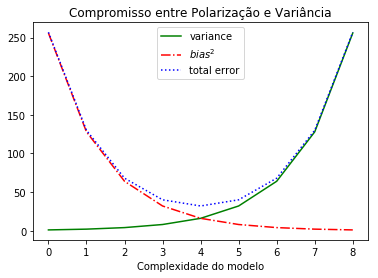

In [43]:
# Dados
variance = [1, 2, 4, 8, 16, 32, 64, 128, 256]
bias_squared = [256, 128, 64, 32, 16, 8, 4, 2, 1]
total_error = [x + y for x, y in zip(variance, bias_squared)]
xs = [i for i, _ in enumerate(variance)]

# Fazendo múltiplas camadas para plt.plot
# Mostra múltiplas séries no mesmo gráfico
plt.plot(xs, variance,'g-', label='variance') # Linha verde sólida
plt.plot(xs, bias_squared, 'r-.', label='$bias^2$') # linha com linha de ponto tracejada vermelha
plt.plot(xs, total_error, 'b:', label='total error') # Linha com pontilhado azul

plt.legend(loc=9) # Legenda, loc=9 indica a localização
plt.xlabel("Complexidade do modelo")
plt.title("Compromisso entre Polarização e Variância")

plt.show()

### Gráficos de Dispersão

* Usado para visualizar a relação entre dois pares de conjuntos de dados.

O exemplo abaixo ilustra o relacionamento entre o número de amigos que seus usuários têm e o número de minutos que eles passam no site por dia:

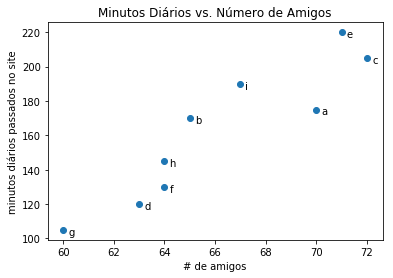

In [46]:
# Dados
friends = [ 70, 65, 72, 63, 71, 64, 60, 64, 67]
minutes = [175, 170, 205, 120, 220, 130, 105, 145, 190]
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i']

plt.scatter(friends, minutes)

# Adicionando cada rótulo em sua posição
for label, friend_count, minute_count in zip(labels, friends, minutes):
    plt.annotate(label,
                xy=(friend_count, minute_count),
                xytext=(5,-5),
                textcoords='offset points')
    
plt.title("Minutos Diários vs. Número de Amigos")

plt.xlabel("# de amigos")
plt.ylabel("minutos diários passados no site")

plt.show()

* É possível que, em caso de variáveis comparáveis, seja obtida uma imagem enganosa ao deixar o padrão do matplotlib para a escala.

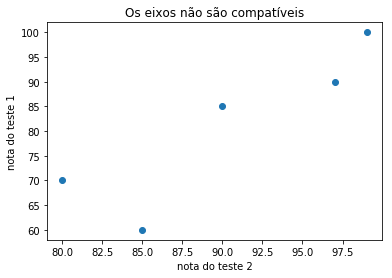

In [47]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades,test_2_grades)

plt.title("Os eixos não são compatíveis")
plt.xlabel("nota do teste 2") 
plt.ylabel("nota do teste 1")
plt.show()

* Caso seja incluída uma chamada para plt.axis("equal") mostra a variação maior que ocorre no teste 2. 

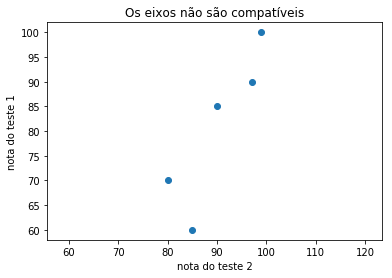

In [49]:
test_1_grades = [ 99, 90, 85, 97, 80]
test_2_grades = [100, 85, 60, 90, 70]

plt.scatter(test_1_grades,test_2_grades)

plt.axis("equal")

plt.title("Os eixos não são compatíveis")
plt.xlabel("nota do teste 2") 
plt.ylabel("nota do teste 1")
plt.show()

### Outras bibliotecas

* seaborn
* Bokeh
* ggplot